In [12]:
import pandas as pd

In [13]:
df= pd.read_csv("/kaggle/input/irse-task1-dataset/Task1.csv")

In [14]:
df.head(10)

,Comments,Surrounding Code Context,Class
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,#NAME?,Not Useful
6,/*unused*/,-5. #define RUN_FOR_SECONDS 7\n-4. static pthr...,Not Useful
7,/*unused*/,-5. #define RUN_FOR_SECONDS 7\n-4. static pthr...,Not Useful
8,/*unused*/,-5. #define RUN_FOR_SECONDS 7\n-4. static pthr...,Not Useful
9,/*unused*/,-5. #define RUN_FOR_SECONDS 7\n-4. static pthr...,Not Useful


In [26]:
counter = 0
for index, row in df.iterrows():
    if row["Class"] == "Useful":
        print(row)
        counter += 1
    if counter > 10:
        break

Comments                              /*get the file size of the local file*/
Surrounding Code Context    -10. #endif\n-9.     return TEST_ERR_USAGE;\n-...
Class                                                                  Useful
Name: 3670, dtype: object
Comments                                        /*can't open file, bail out*/
Surrounding Code Context    -2.   hd = fstat(fileno(hd_src), &file_info);\...
Class                                                                  Useful
Name: 3671, dtype: object
Comments                                                 /*enable uploading*/
Surrounding Code Context    -10.     fprintf(stderr, "ERROR: cannot open f...
Class                                                                  Useful
Name: 3672, dtype: object
Comments                                                   /*specify target*/
Surrounding Code Context    -1.   easy_setopt(curl, CURLOPT_UPLOAD, 1L);\n...
Class                                                           

In [19]:
df.shape

(11452, 3)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11452 entries, 0 to 11451
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Comments                  11452 non-null  object
 1   Surrounding Code Context  11452 non-null  object
 2   Class                     11452 non-null  object
dtypes: object(3)
memory usage: 268.5+ KB


In [21]:
print(df.isnull().sum())

Comments                    0
Surrounding Code Context    0
Class                       0
dtype: int64


In [22]:
df.describe()

,Comments,Surrounding Code Context,Class
count,11452,11452,11452
unique,7107,7791,2
top,/*********************************************...,#NAME?,Useful
freq,144,72,7063


In [22]:
print(df.dtypes)

Comments                    object

Surrounding Code Context    object

Class                       object

dtype: object


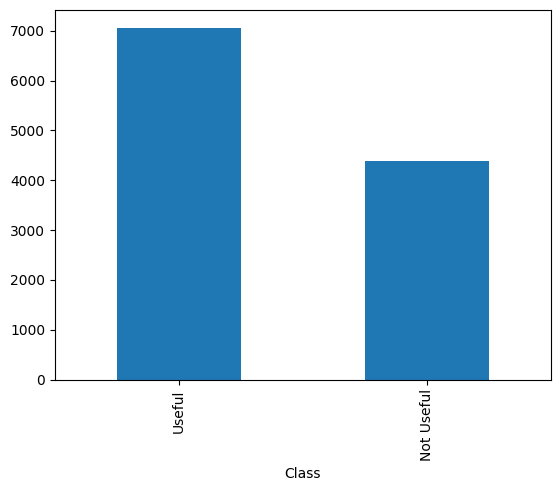

In [25]:
import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with statements, and your task is to convert them to standard English."
    },
    {
      "role": "user",
      "content": "She no went to the market."
    }
  ],
  temperature=0.7,
  max_tokens=64,
  top_p=1
)

In [2]:
!pip install transformers

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the CodeT5 tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")
model = AutoModelForSequenceClassification.from_pretrained("Salesforce/codet5-base", num_labels=2)  # 2 labels for useful and not useful

# Set the model to evaluation mode (you can skip this during training)
model.eval()


tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at Salesforce/codet5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


T5ForSequenceClassification(
  (transformer): T5Model(
    (shared): Embedding(32100, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32100, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear(in_feat

In [8]:
# Example code-comment pair
code_snippet = "def add(a, b): return a + b"
comment = "This function subtracts two numbers"

# Preprocess the input using the tokenizer
inputs = tokenizer(f"code: {code_snippet} comment: {comment}", return_tensors="pt", max_length=512, truncation=True, padding="max_length")

# Check the tokenized input
print(inputs)


{'input_ids': tensor([[    1,   710,    30,  1652,   527,    12,    69,    16,   324,  4672,
           327,   279,   397,   324,  2879,    30,  1220,   445, 10418,    87,
          2795,  5600,     2,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [9]:
# Perform the forward pass to get logits (raw model output)
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits from the model output
logits = outputs.logits

# Apply softmax to get probabilities
probs = torch.softmax(logits, dim=1)

# Get the predicted label (0 or 1)
predicted_label = torch.argmax(probs, dim=1).item()

# Map predicted label to the corresponding class
label_map = {0: "Not Useful", 1: "Useful"}
predicted_class = label_map[predicted_label]

print(f"Predicted Class: {predicted_class}")


Predicted Class: Useful


In [1]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
# Load dataset
df = pd.read_csv("/kaggle/input/irse-task1-dataset/Task1.csv")

# Clean and convert the 'Class' column to binary labels (1 for Useful, 0 for Not Useful)
# Clean and convert the 'Class' column to binary labels (1 for Useful, 0 for Not Useful)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'Useful' else 0)

# Load the tokenizer and model (for example, CodeT5 for code-related tasks)
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")
model = AutoModelForSequenceClassification.from_pretrained("Salesforce/codet5-base", num_labels=2)  # Binary classification

# Function to preprocess each example
def preprocess_function(examples):
    return tokenizer(f"code: {examples['Surrounding Code Context']} comment: {examples['Comments']}", 
                     truncation=True, 
                     padding="max_length", 
                     max_length=512)

# Preprocessing the dataset
encoded_inputs = df.apply(lambda x: preprocess_function({'Surrounding Code Context': x['Surrounding Code Context'], 
                                                         'Comments': x['Comments']}), axis=1)

# Convert the tokenized inputs and labels into tensors for PyTorch
input_ids = torch.tensor([ex['input_ids'] for ex in encoded_inputs])
attention_mask = torch.tensor([ex['attention_mask'] for ex in encoded_inputs])
labels = torch.tensor(df['Class'].values)

# # Create a PyTorch dataset for training
# train_dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, labels)

# # Use a data collator to handle padding
# data_collator = DataCollatorWithPadding(tokenizer)

# # Define training arguments (standard fine-tuning configuration)
# training_args = TrainingArguments(
#     output_dir="./results",               # output directory for model checkpoints
#     learning_rate=2e-5,                   # learning rate
#     per_device_train_batch_size=8,        # batch size per device
#     num_train_epochs=3,                   # number of epochs
#     weight_decay=0.01,                    # weight decay
#     logging_dir="./logs",                 # directory for logging (optional)
#     logging_steps=10,                     # log every 10 steps (optional)
#     save_steps=500,                       # save checkpoints every 500 steps (optional)
#     save_total_limit=2,                   # only keep the last 2 checkpoints (optional)
# )

# # Initialize the Trainer with the model, arguments, and dataset
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     data_collator=data_collator,
# )

# # Fine-tune the model
# trainer.train()


# Create a PyTorch dataset and DataLoader
train_dataset = TensorDataset(input_ids, attention_mask, labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3
model.train()

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    for batch in train_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        # Backward pass
        loss.backward()
        
        # Optimize the model
        optimizer.step()
        optimizer.zero_grad()

        print(f"Batch loss: {loss.item()}")

print("Training completed.")

tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at Salesforce/codet5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 44.12 MiB is free. Process 3929 has 14.70 GiB memory in use. Of the allocated memory 14.41 GiB is allocated by PyTorch, and 167.36 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [30]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.cuda.amp import GradScaler, autocast

# Load dataset
df = pd.read_csv("/kaggle/input/irse-task1-dataset/Task1.csv")

# Clean and convert the 'Class' column to binary labels (1 for Useful, 0 for Not Useful)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'Useful' else 0)

# Load the tokenizer and model (e.g., CodeT5 for code-related tasks)
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")
model = AutoModelForSequenceClassification.from_pretrained("Salesforce/codet5-base", num_labels=2)  # Binary classification

# Function to preprocess each example
def preprocess_function(examples):
    return tokenizer(
        f"code: {examples['Surrounding Code Context']} comment: {examples['Comments']}", 
        truncation=True, 
        padding="max_length", 
        max_length=256  # Reduced from 512
    )

# Preprocessing the dataset
encoded_inputs = df.apply(
    lambda x: preprocess_function({
        'Surrounding Code Context': x['Surrounding Code Context'], 
        'Comments': x['Comments']
    }), 
    axis=1
)

# Convert the tokenized inputs and labels into tensors for PyTorch
input_ids = torch.tensor([ex['input_ids'] for ex in encoded_inputs])
attention_mask = torch.tensor([ex['attention_mask'] for ex in encoded_inputs])
labels = torch.tensor(df['Class'].values)

input_ids_train, input_ids_test, attention_mask_train, attention_mask_test, labels_train, labels_test = train_test_split(
    input_ids, attention_mask, labels, test_size=0.3, random_state=42
)

# Create PyTorch TensorDatasets for train and test sets
train_dataset = TensorDataset(input_ids_train, attention_mask_train, labels_train)
test_dataset = TensorDataset(input_ids_test, attention_mask_test, labels_test)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Reduced batch size for example
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)
# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the gradient scaler for mixed precision
scaler = GradScaler()

# Define gradient accumulation steps (optional)
accumulation_steps = 10  # Set to >1 if using gradient accumulation

# Training loop with mixed precision and optional gradient accumulation
epochs = 7
model.train()

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        
        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss = loss / accumulation_steps  # Normalize loss if using accumulation

        scaler.scale(loss).backward()
        
        if (step + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        print(f"Batch loss: {loss.item() * accumulation_steps}")

    # Clear cache at the end of each epoch
    torch.cuda.empty_cache()

print("Training completed.")


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at Salesforce/codet5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation tor

Epoch 1/7
Batch loss: 0.8737792819738388
Batch loss: 0.7476196438074112
Batch loss: 0.7188873738050461
Batch loss: 0.7958526909351349
Batch loss: 0.6571655720472336
Batch loss: 0.4599761962890625
Batch loss: 0.8472748100757599
Batch loss: 0.6558533012866974
Batch loss: 1.1119995266199112
Batch loss: 0.7671203464269638
Batch loss: 0.561981201171875
Batch loss: 0.5241546779870987
Batch loss: 0.7235107570886612
Batch loss: 1.0980530083179474
Batch loss: 0.6794510036706924
Batch loss: 0.3585357591509819
Batch loss: 0.5751876905560493
Batch loss: 0.9009323269128799
Batch loss: 0.8054047077894211
Batch loss: 0.9793549031019211
Batch loss: 1.32537841796875
Batch loss: 0.8147735893726349
Batch loss: 0.7208557426929474
Batch loss: 0.4441986232995987
Batch loss: 0.6198730692267418
Batch loss: 0.6303711235523224
Batch loss: 0.7070465385913849
Batch loss: 0.6348495930433273
Batch loss: 0.9415894001722336
Batch loss: 0.7645111531019211
Batch loss: 0.5320587381720543
Batch loss: 0.8695831149816513
B

In [16]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [31]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def test(model, test_dataloader, device):
    # Put the model in evaluation mode
    model.eval()
    
    total_loss = 0
    predictions = []
    true_labels = []
    
    # No need to track gradients for evaluation
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            # Forward pass (inference)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            # Accumulate total loss
            total_loss += loss.item()
            
            # Get predictions (logits are the raw model outputs before activation)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            label_ids = labels.cpu().numpy()

            # Collect predictions and true labels
            predictions.extend(preds)
            true_labels.extend(label_ids)
    
    # Calculate average loss
    avg_loss = total_loss / len(test_dataloader)
    
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, predictions)

    # Print results
    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    return avg_loss, accuracy, precision, recall, f1, conf_matrix


In [29]:
#Epoch=3

avg_loss, accuracy, precision, recall, f1, conf_matrix = test(model, test_dataloader, device)

Test Loss: 0.2579
Accuracy: 88.59%
Precision: 0.94
Recall: 0.88
F1-Score: 0.90
Confusion Matrix:
[[1188  128]
 [ 264 1856]]


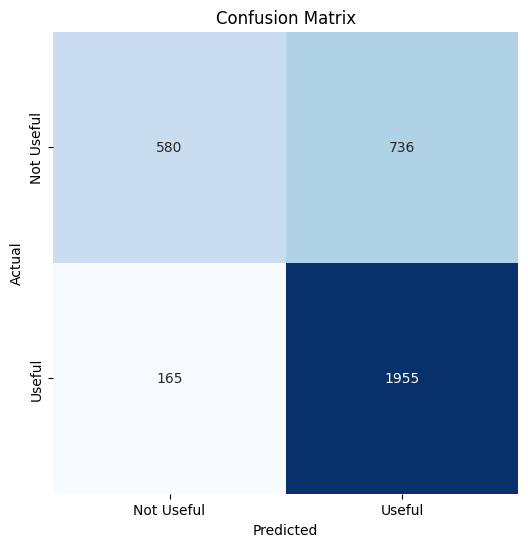

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Not Useful', 'Useful'], 
                yticklabels=['Not Useful', 'Useful'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# After testing, you can call the plot function
plot_confusion_matrix(conf_matrix)


In [32]:
#Epoch=7

avg_loss, accuracy, precision, recall, f1, conf_matrix = test(model, test_dataloader, device)

Test Loss: 0.1948
Accuracy: 91.76%
Precision: 0.90
Recall: 0.98
F1-Score: 0.94
Confusion Matrix:
[[1081  235]
 [  48 2072]]


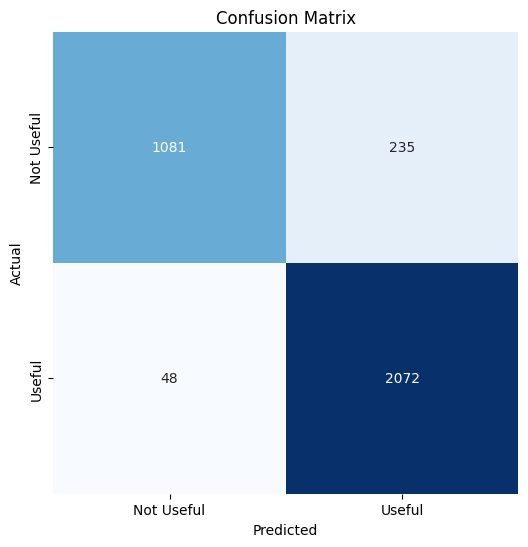

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Not Useful', 'Useful'], 
                yticklabels=['Not Useful', 'Useful'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# After testing, you can call the plot function
plot_confusion_matrix(conf_matrix)

In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the fine-tuned model and tokenizer

# Set the model to evaluation mode
model.eval()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example of a single input (comment + code context)
comment = "#test 45"
code_context = ""

# Tokenize the input
input_text = f"code: {code_context} comment: {comment}"
inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

# Perform inference (disable gradient calculations)
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class (logits to probabilities)
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=1).item()

# Interpret the output
class_mapping = {0: "Not Useful", 1: "Useful"}  # Map the predicted label to the class name
print(f"Predicted class: {class_mapping[predicted_class]}")


Predicted class: Useful


In [31]:
import torch
torch.cuda.empty_cache()